In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combindations
lats = np.random.uniform(low= -90.000,  high= 90.000,  size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-42.79896691735367 93.88865173881516
83.75614223989814 -113.19684331207665
82.37608305242046 -59.3146062594997
54.309267061138854 -55.88688758670578
19.255948478666852 46.07827558007054
-62.77122938934038 -115.1219004548193
25.257994666971683 109.72864279442939
82.53738945476078 132.06456046404907
50.4747855408516 -100.44056899566671
80.20714342680694 -179.36885821972734
-25.78617905685644 98.17974845416211
69.41615950656629 -55.29649025095178
-5.664053403005738 -3.2165032106415197
-14.339462142893083 -29.745657899104856
-87.27946429826689 130.35522427503895
-33.91144171366372 -9.817728688137947
25.592132674025294 -50.23196314162368
15.425125365523002 -66.81929870339155
19.51959381837699 -2.179957777030012
38.235227379908395 -69.2590489748557
-19.511438134515757 -21.258692051479784
76.3743541496996 -46.285797284921216
-83.03913099971943 120.29468483810831
22.054285394029662 -108.10292449597522
50.10089741961875 87.04806781951453
-79.54076139344045 -174.45418318879751
35.99757189238656 

37.50315361547308 135.25308014942425
-37.37332253494573 -64.32380389634278
-66.88466396959045 90.82938209593203
85.02895490716665 -1.3354889781724353
25.955337978926494 37.458822683715255
4.844592504977257 -111.25130837895298
-68.97513524626953 -124.30639059452952
40.25384858903749 20.781662010122062
85.9040673972512 6.6352121254244025
-27.376464545115887 104.74303272826768
-70.98434553926916 165.19091369272002
29.410697823416342 28.9558133313499
-4.7854005061049065 -28.45841859592136
-74.10367238536534 80.9565715292656
-85.26242959931898 86.57951877824058
-52.3376829456443 144.20516692711828
21.325381311234025 141.4664176641872
26.85375410248821 -128.11247288004247
79.51346382821649 112.33573645278057
49.875328411901506 -60.61056565087037
-48.820559176488935 -78.05320545758886
64.41414447034123 20.709114348383025
-51.250361189006064 173.43108303561206
-76.18376315469753 -140.49276264713924
-59.12473821428237 144.6012133938022
-48.078615453125806 -135.55376968707574
-13.398231502896635

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
      citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
yellowknife ca
upernavik gl
saint anthony ca
najran sa
rikitea pf
guilin cn
tiksi ru
rivers ca
mys shmidta ru
carnarvon au
kangaatsiaq gl
jamestown sh
maceio br
new norfolk au
jamestown sh
codrington ag
guanica us
araouane ml
nantucket us
georgetown sh
ilulissat gl
albany au
cabo san lucas mx
aktash ru
vaini to
kapaa us
kashi cn
carlos antonio lopez py
castro cl
longlac ca
hobart au
ahipara nz
waipawa nz
lubango ao
bethel us
gacko ba
kununurra au
illoqqortoormiut gl
kodiak us
troitsko-pechorsk ru
havre-saint-pierre ca
tuktoyaktuk ca
khilok ru
punta arenas cl
ponta do sol cv
vila vu
bredasdorp za
praia da vitoria pt
hermanus za
albany au
norman wells ca
boali cf
viligili mv
new norfolk au
uvat ru
peniche pt
hilo us
nizip tr
comodoro rivadavia ar
hervey bay au
butaritari ki
busselton au
barrow us
albany au
tuxpan mx
atuona pf
mackay au
rikitea pf
padang id
punta arenas cl
albany au
saldanha za
ushuaia ar
illoqqortoormiut gl
mahebourg mu
bluff nz
albany au
mataura pf
atuona p

gobo jp
clyde river ca
yaan cn
ende id
arlit ne
mashhad ir
rikitea pf
anadyr ru
carnarvon au
hithadhoo mv
poum nc
barentsburg sj
atuona pf
oriximina br
kahului us
mastung pk
torbay ca
cape town za
henties bay na
tuktoyaktuk ca
ushuaia ar
cherskiy ru
hyeres fr
asau tv
bria cf
hilo us
hobart au
castro cl
rikitea pf
la ronge ca
esperance au
alugan ph
fangshan cn
porto novo cv
mareeba au
leningradskiy ru
saint george bm
mar del plata ar
rikitea pf
busselton au
rikitea pf
palabuhanratu id
kapaa us
qaanaaq gl
chicama pe
mecca sa
parras mx
busselton au
rio gallegos ar
upernavik gl
ukiah us
faanui pf
busselton au
grand gaube mu
dali cn
plettenberg bay za
xianshuigu cn
veraval in
mataram id
qaqortoq gl
barentsburg sj
baoding cn
palabuhanratu id
chuncheng cn
qaqortoq gl
nikolskoye ru
bonnyville ca
albany au
avarua ck
colares pt
abu samrah qa
mataura pf
rikitea pf
lompoc us
alyangula au
ibra om
upernavik gl
bengkulu id
tianpeng cn
bluff nz
tucurui br
rikitea pf
tiksi ru
hobart au
manoharpur in
ba

jamestown sh
tuktoyaktuk ca
stornoway gb
gat ly
riyadh sa
illoqqortoormiut gl
taolanaro mg
puerto ayora ec
atuona pf
wanning cn
boddam gb
saint-philippe re
nanortalik gl
sainte-luce mq
airai pw
mataura pf
esperance au
necochea ar
punta arenas cl
vaini to
yarmouth ca
tavricheskoye ru
williston us
nikolsk ru
anori br
rikitea pf
isangel vu
vaini to
chipinge zw
naryan-mar ru
albany au
bluff nz
kapaa us
kologriv ru
aflu dz
new norfolk au
sitka us
dikson ru
port elizabeth za
hilo us
port augusta au
kapaa us
esso ru
okha ru
new norfolk au
mrirt ma
tessalit ml
puerto ayora ec
vaitupu wf
lolua tv
mahebourg mu
illoqqortoormiut gl
tautira pf
bluff nz
atuona pf
bethel us
deputatskiy ru
dikson ru
nikolskoye ru
vaini to
tuktoyaktuk ca
bengkulu id
hilo us
rikitea pf
bredasdorp za
rikitea pf
grand river south east mu
panormos gr
victoria sc
cockburn harbour tc
arraial do cabo br
tuktoyaktuk ca
achacachi bo
san cristobal ec
codrington ag
cape town za
cherskiy ru
coihaique cl
san cristobal ec
cape town 

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Import the time library and the datetime module from teh datetime library
import time
from datetime import datetime

In [13]:
# Loop through all the cities in our list
#for i in range(len(cities)):
    
# Group cities in sets of 50 for logging purpose   
#if (i % 50==0 and i>=50):           
#set_count+=1
#recors_count=1
#time.sleep(60)

# Create endpoiny URL with each city
#city_url =url +"&q="+ cities[i]

In [14]:
# Create empty list to hold the weather data
city_data=[]
# Print the begining of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters.
record_count=1
set_count=1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | saint anthony
Processing Record 5 of Set 1 | najran
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | guilin
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | rivers
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | kangaatsiaq
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | maceio
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | guanica
Processing Record 18 of Set 1 | araouane
Processing Record 19 of Set 1 | nantucket
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | albany
Process

Processing Record 36 of Set 4 | labuhan
Processing Record 37 of Set 4 | lompoc
Processing Record 38 of Set 4 | lahij
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | kutum
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | zemio
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | peace river
Processing Record 48 of Set 4 | astara
Processing Record 49 of Set 4 | kalengwa
Processing Record 50 of Set 4 | omboue
Processing Record 1 of Set 5 | sidney
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | nador
Processing Record 4 of Set 5 | marsabit
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | orangeburg
Processing Record 7 of Set 5 | virden
Processing Record 8 of Set 5 | bonavista
Processing Record 9 of Set 5 | obodivk

Processing Record 30 of Set 8 | dali
Processing Record 31 of Set 8 | plettenberg bay
Processing Record 32 of Set 8 | xianshuigu
Processing Record 33 of Set 8 | veraval
Processing Record 34 of Set 8 | mataram
Processing Record 35 of Set 8 | qaqortoq
Processing Record 36 of Set 8 | baoding
Processing Record 37 of Set 8 | chuncheng
Processing Record 38 of Set 8 | bonnyville
Processing Record 39 of Set 8 | colares
Processing Record 40 of Set 8 | abu samrah
Processing Record 41 of Set 8 | alyangula
Processing Record 42 of Set 8 | ibra
Processing Record 43 of Set 8 | tianpeng
Processing Record 44 of Set 8 | tucurui
Processing Record 45 of Set 8 | manoharpur
Processing Record 46 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 47 of Set 8 | paracuru
Processing Record 48 of Set 8 | halifax
Processing Record 49 of Set 8 | ingham
Processing Record 50 of Set 8 | korla
Processing Record 1 of Set 9 | aleksandrov gay
Processing Record 2 of Set 9 | lolua
City not found. Skipping...


Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | auki
Processing Record 21 of Set 12 | poniatowa
Processing Record 22 of Set 12 | bani walid
Processing Record 23 of Set 12 | westport
Processing Record 24 of Set 12 | camacha
Processing Record 25 of Set 12 | harda
Processing Record 26 of Set 12 | tortoli
Processing Record 27 of Set 12 | miramar
Processing Record 28 of Set 12 | buariki
City not found. Skipping...
Processing Record 29 of Set 12 | benguela
Processing Record 30 of Set 12 | yar-sale
Processing Record 31 of Set 12 | verkhnevilyuysk
Processing Record 32 of Set 12 | mae chan
Processing Record 33 of Set 12 | baykit
Processing Record 34 of Set 12 | bilma
Processing Record 35 of Set 12 | ketchikan
Processing Record 36 of Set 12 | mayor pablo lagerenza
Processing Record 37 of Set 12 | kavieng
Processing Record 38 of Set 12 | muzaffargarh
Processing Record 39 of Set 12 | thunder bay
Processing Record 40 of Set 12 | reconquista
Processing Record 41 of Set 12 |

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,57.27,77,98,22.41,AU,2022-08-07 22:20:03
1,Yellowknife,62.4560,-114.3525,63.12,67,75,4.61,CA,2022-08-07 22:17:01
2,Upernavik,72.7868,-56.1549,42.46,83,84,8.30,GL,2022-08-07 22:20:04
3,Saint Anthony,45.0205,-93.2180,75.25,73,100,9.22,US,2022-08-07 22:15:29
4,Najran,17.4924,44.1277,83.05,44,9,7.18,SA,2022-08-07 22:20:04
5,Rikitea,-23.1203,-134.9692,72.52,69,100,32.12,PF,2022-08-07 22:20:04
6,Guilin,25.2819,110.2864,76.23,90,87,0.76,CN,2022-08-07 22:20:05
7,Tiksi,71.6872,128.8694,46.29,96,100,3.33,RU,2022-08-07 22:20:05
8,Rivers,50.0308,-100.2403,72.55,39,0,7.25,CA,2022-08-07 22:20:05
9,Carnarvon,-24.8667,113.6333,61.75,79,0,11.25,AU,2022-08-07 22:20:06


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                  New Norfolk
Lat                      -42.7826
Lng                      147.0587
Max Temp                     35.1
Humidity                       89
Cloudiness                     12
Wind Speed                   2.62
Country                        AU
Date          2022-08-07 22:20:07
Name: 13, dtype: object

In [19]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3       True
4       True
       ...  
589     True
590     True
591    False
592     True
593     True
Name: Lat, Length: 594, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Yellowknife,62.4560,-114.3525,63.12,67,75,4.61,CA,2022-08-07 22:17:01
2,Upernavik,72.7868,-56.1549,42.46,83,84,8.30,GL,2022-08-07 22:20:04
3,Saint Anthony,45.0205,-93.2180,75.25,73,100,9.22,US,2022-08-07 22:15:29
4,Najran,17.4924,44.1277,83.05,44,9,7.18,SA,2022-08-07 22:20:04
6,Guilin,25.2819,110.2864,76.23,90,87,0.76,CN,2022-08-07 22:20:05
...,...,...,...,...,...,...,...,...,...
588,Batagay,67.6333,134.6333,67.66,60,92,6.69,RU,2022-08-07 22:34:42
589,Yenangyaung,20.4667,94.8833,77.27,89,97,10.22,MM,2022-08-07 22:34:42
590,Road Town,18.4167,-64.6167,86.09,89,40,10.36,VG,2022-08-07 22:34:43
592,Shitanjing,39.2342,106.3439,73.13,66,93,3.74,CN,2022-08-07 22:34:43


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
from scipy.stats import linregress

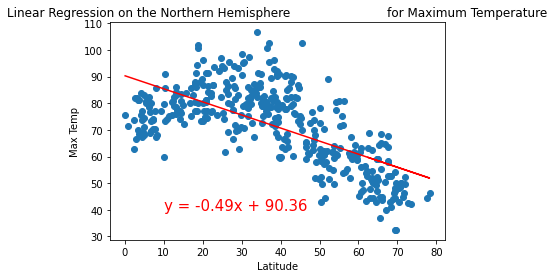

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

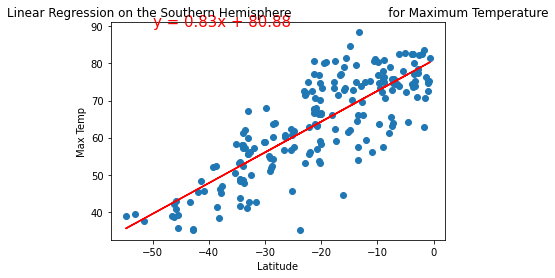

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

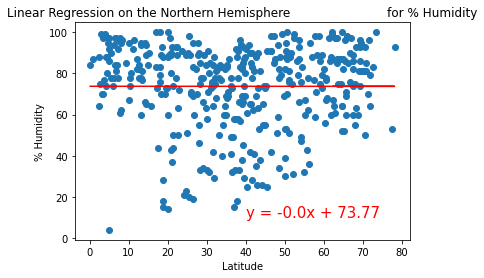

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

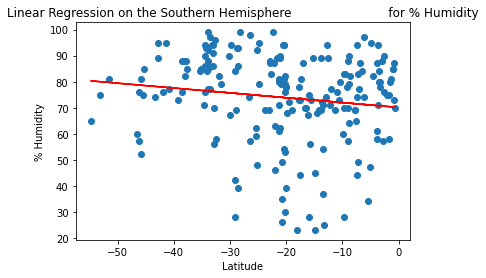

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

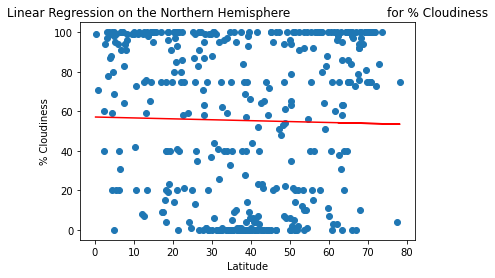

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

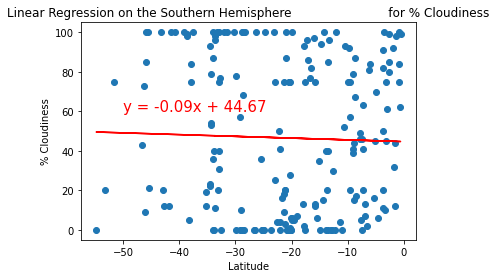

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

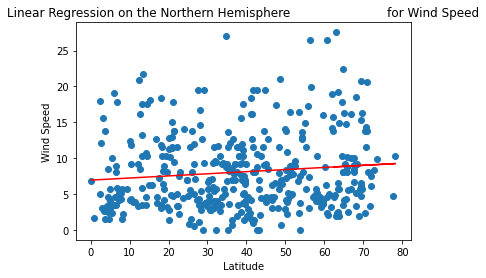

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

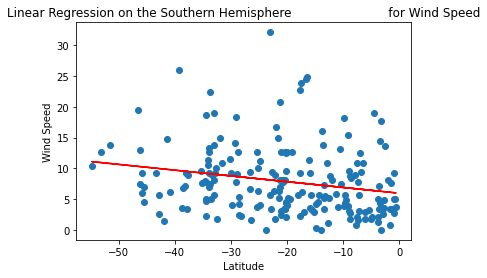

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))